# Clasificación con Redes Neuronales Artificiales

## Preprocesamiento de datos

In [ ]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# RNA
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Visualización de resultados
from sklearn.metrics import confusion_matrix

In [ ]:
# Dataset desde el repositorio en Drive
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=1nUzOPwzxXrjeFE-_S4tzXUECfGdZeoms&confirm=t" -O datos_acv.zip

--2023-09-22 20:19:29--  https://drive.google.com/uc?export=download&id=1nUzOPwzxXrjeFE-_S4tzXUECfGdZeoms&confirm=t
Resolving drive.google.com (drive.google.com)... 172.253.114.100, 172.253.114.113, 172.253.114.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.114.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0ko9csifr7ogcf5r29fa5kju905bv9m0/1695413925000/12225850433951268217/*/1nUzOPwzxXrjeFE-_S4tzXUECfGdZeoms?e=download&uuid=e57dd65b-d1be-4121-83e5-2002b5903f6f [following]
--2023-09-22 20:19:29--  https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0ko9csifr7ogcf5r29fa5kju905bv9m0/1695413925000/12225850433951268217/*/1nUzOPwzxXrjeFE-_S4tzXUECfGdZeoms?e=download&uuid=e57dd65b-d1be-4121-83e5-2002b5903f6f
Resolving doc-0s-9c-docs.googleusercontent.com (doc-0s-9c-docs.googleusercontent.com)... 74.125.

In [ ]:
!unzip datos_acv.zip

Archive:  datos_acv.zip
  inflating: datos_acv.csv           


In [ ]:
# Lectura del dataset
dataset = pd.read_csv("datos_acv.csv")

In [ ]:
# Para visualizar tipos de datos
# Además, se evidencian valores nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5110 non-null   int64  
 1   genero              5110 non-null   object 
 2   edad                5110 non-null   float64
 3   hipertension        5110 non-null   int64  
 4   enfermedad_corazon  5110 non-null   int64  
 5   casado_alguna_vez   5110 non-null   int64  
 6   tipo_trabajo        5110 non-null   object 
 7   tipo_residencia     5110 non-null   object 
 8   nivel_glucosa       5110 non-null   float64
 9   imc                 4909 non-null   float64
 10  estado_fumador      5110 non-null   object 
 11  apoplejia           5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [ ]:
# Para obtener los valores nulos directamente
dataset.isna().sum()

id                      0
genero                  0
edad                    0
hipertension            0
enfermedad_corazon      0
casado_alguna_vez       0
tipo_trabajo            0
tipo_residencia         0
nivel_glucosa           0
imc                   201
estado_fumador          0
apoplejia               0
dtype: int64

In [ ]:
# Categorías disponibles en las variables categóricas
for col in dataset.columns:
    if dataset[col].dtype == 'object' or (dataset[col].dtype == 'int64' and col != 'id'):
        print(col,"->", dataset[col].unique())

genero -> ['hombre' 'mujer' 'otro']
hipertension -> [0 1]
enfermedad_corazon -> [1 0]
casado_alguna_vez -> [1 0]
tipo_trabajo -> ['privado' 'autonomo' 'gubernamental' 'con_niños' 'nunca_trabajo']
tipo_residencia -> ['urbano' 'rural']
estado_fumador -> ['fumaba' 'nunca' 'fuma' 'desconocido']
apoplejia -> [1 0]


<Axes: ylabel='tipo_trabajo'>

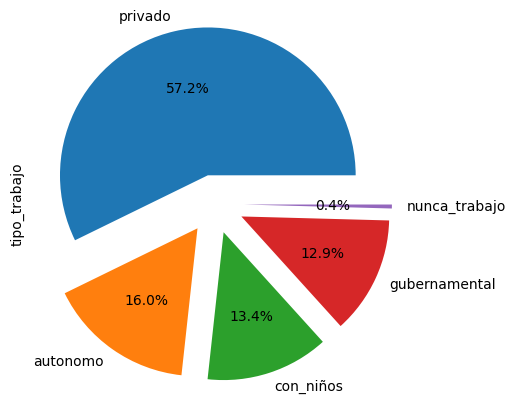

In [ ]:
# Ejemplo de gráfica para una idea de las distribuciones
dataset['tipo_trabajo'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
# Para quitar columnas del dataset
dataset.pop('id')

# Para quitar filas según un criterio
dataset = dataset[dataset.genero != 'otro']  # Nos quedamos con hombre y mujer solamente
dataset = dataset[dataset.tipo_trabajo != 'nunca_trabajo'] # Quitamos los que nunca trabajaron, probablemente sean muy jóvenes

In [ ]:
# Ejemplo de tratamiento de valores faltantes, se reemplazan por la media de la columna. (No siempre es conveniente esto, analizar)
dataset['imc'].fillna(dataset['imc'].median(), inplace=True)
# Se vuelve a contabilizar para testear la actualización
dataset.isna().sum()

genero                0
edad                  0
hipertension          0
enfermedad_corazon    0
casado_alguna_vez     0
tipo_trabajo          0
tipo_residencia       0
nivel_glucosa         0
imc                   0
estado_fumador        0
apoplejia             0
dtype: int64

In [ ]:
# Aplicamos un filtro para evidencias estos valores faltantes en la información básica del dataset
dataset['estado_fumador'].replace(r'desconocido', np.nan, inplace = True)
dataset.isna().sum()        # Se puede hacer algo con estos casos

genero                   0
edad                     0
hipertension             0
enfermedad_corazon       0
casado_alguna_vez        0
tipo_trabajo             0
tipo_residencia          0
nivel_glucosa            0
imc                      0
estado_fumador        1536
apoplejia                0
dtype: int64

<ipython-input-15-f53867162055>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dataset.corr(), annot=True)


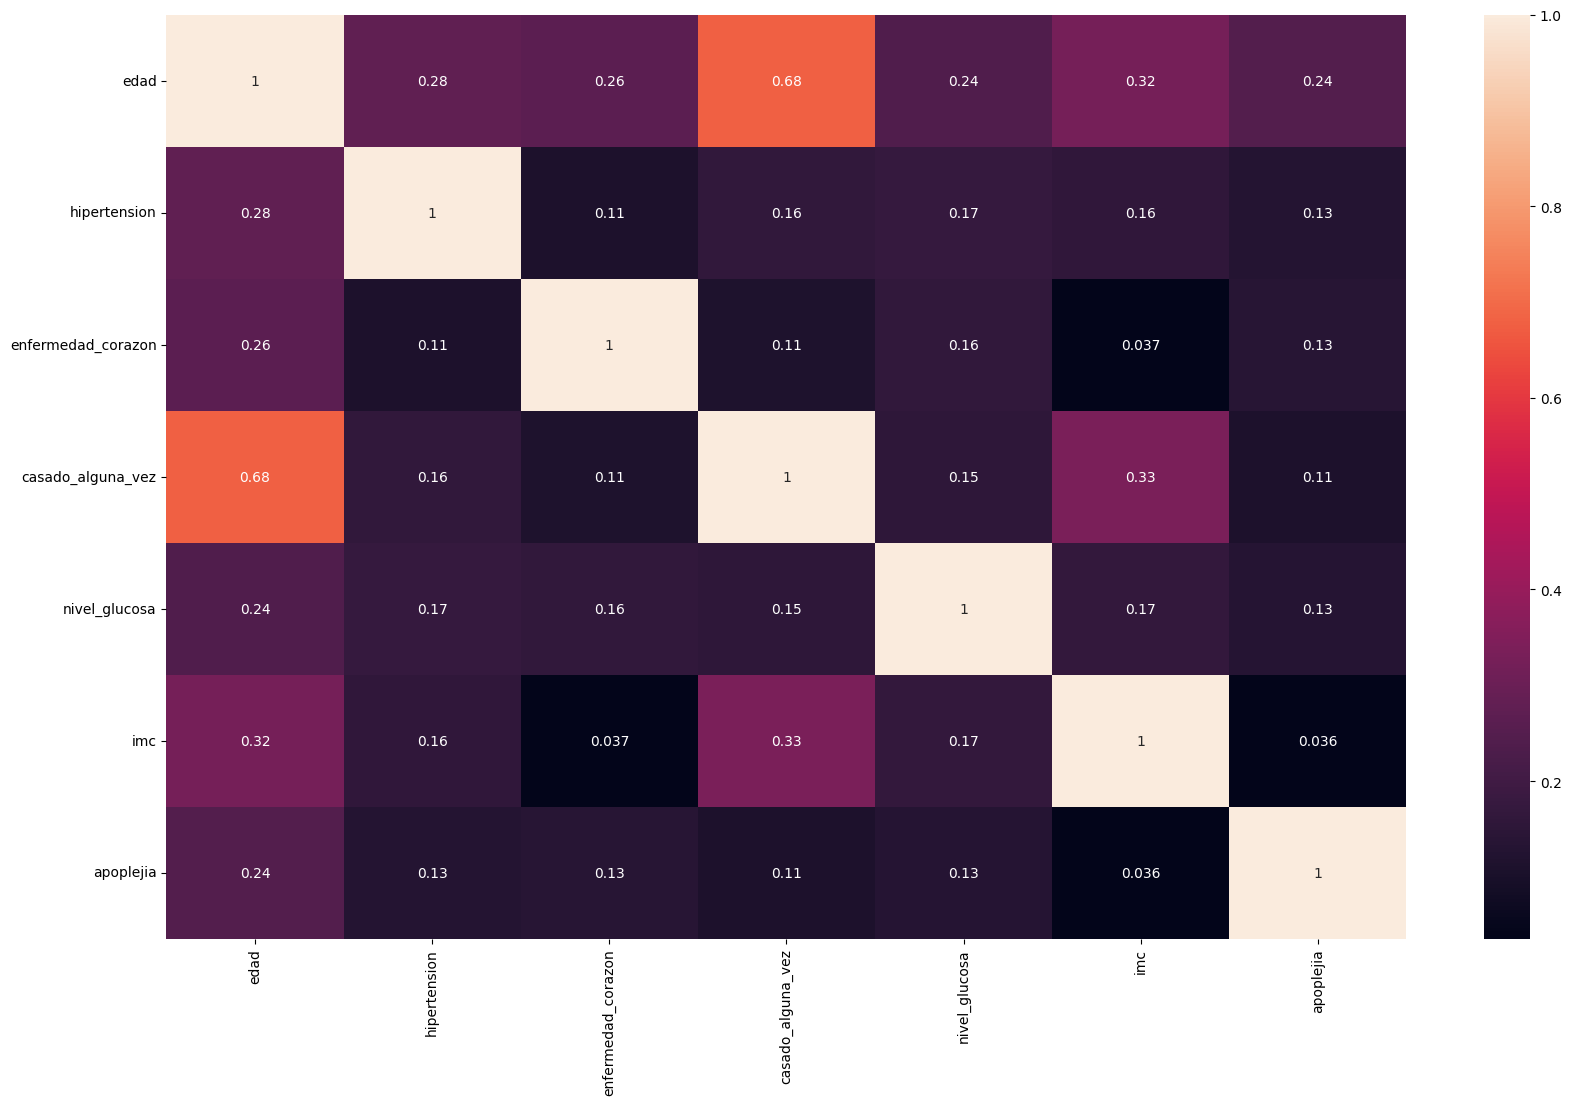

In [ ]:
# Mapa de correlaciones, se puede observar dependencias entre columnas. Permite descartar descriptores que no aportan información nueva por ejemplo (resta costo computacional, etc.)
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# En este caso por ejemplo, se observa una fuerte relación entre la edad y si estuvieron casados.

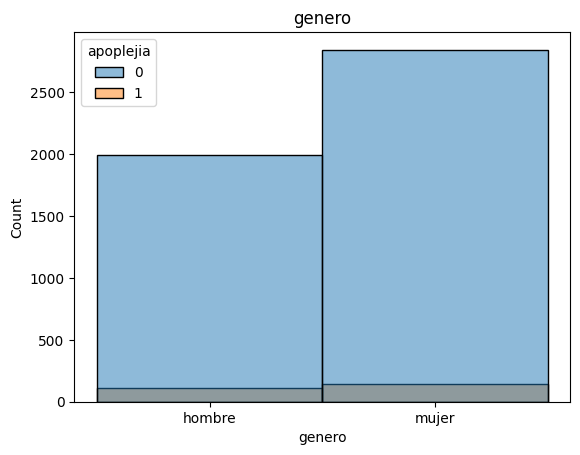

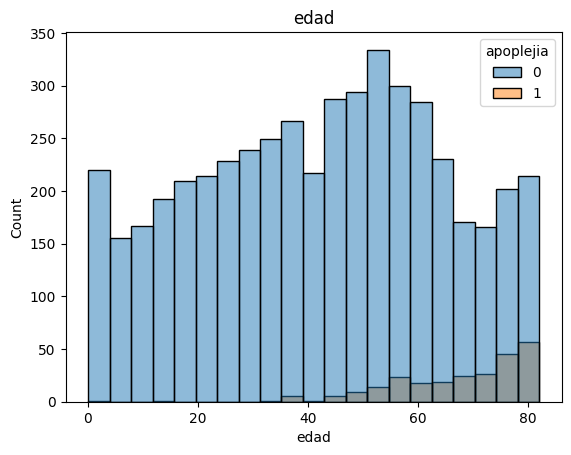

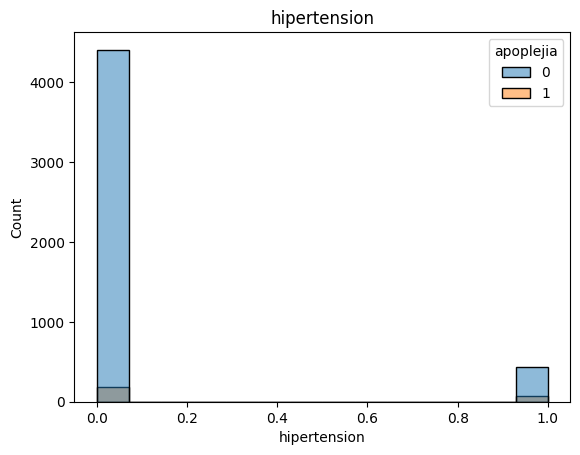

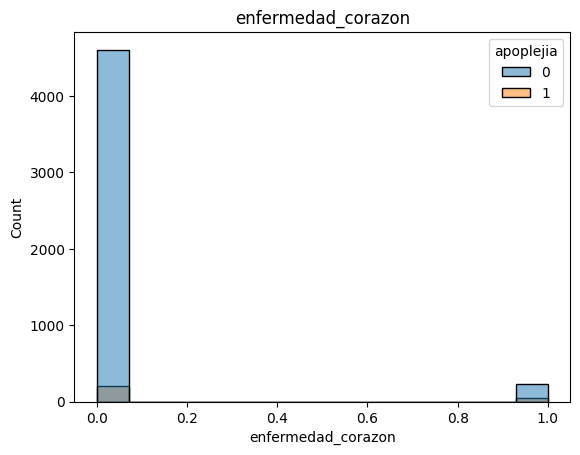

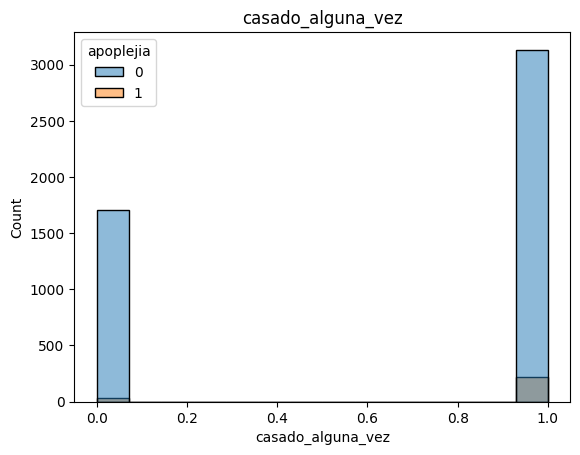

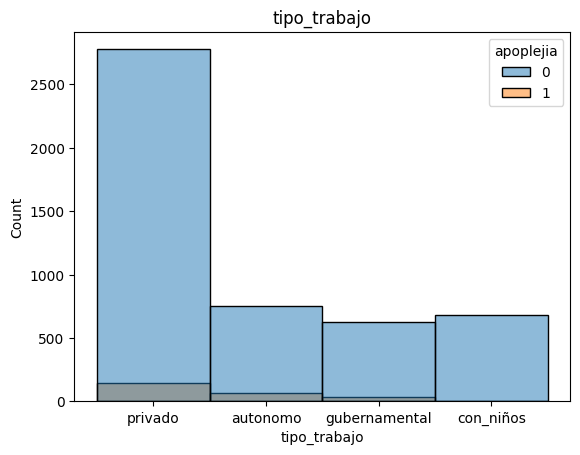

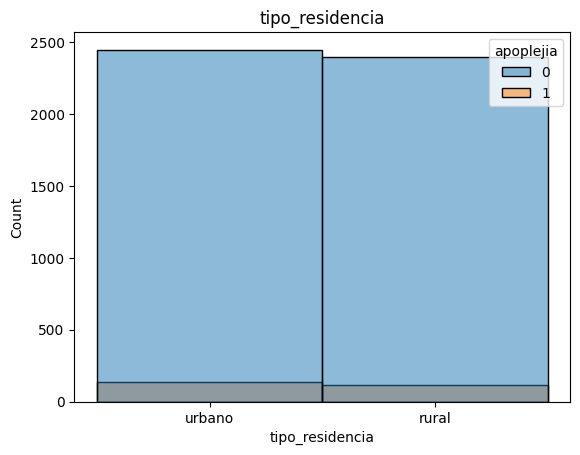

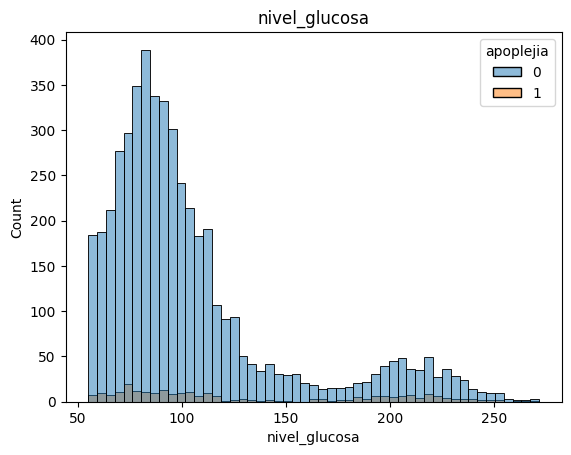

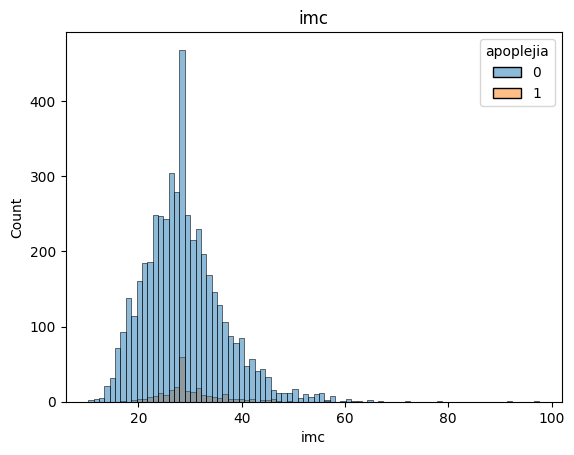

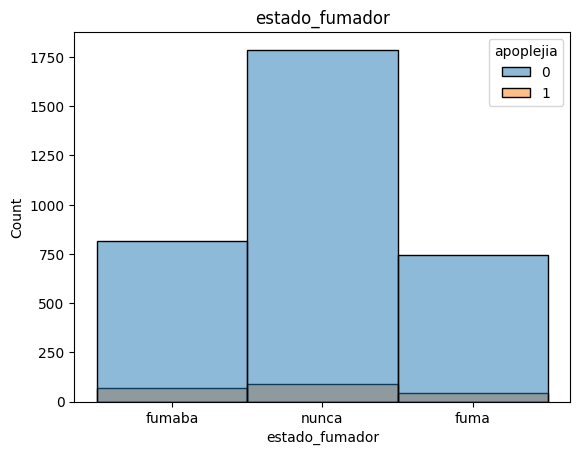

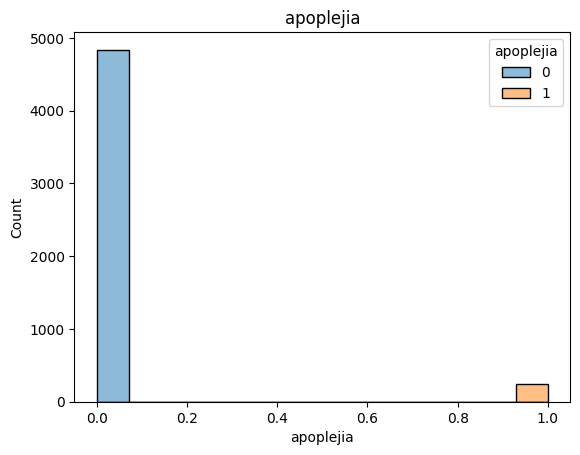

In [ ]:
# Más ejemplos de gráficas. Distribuciones respecto a la salida
for col in dataset.columns:
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='apoplejia')
    plt.show()

In [ ]:
# Tratamiento de los datos y división del dataset

# Definición de la columna de salida esperada (aprendizaje supervisado)
y_data = dataset.pop('apoplejia')
y_data = np.asarray(y_data).astype('float32')

# Preprocesamiento
# Se codifica numéricamente las categorías definidas con etiquetas. Ej.: en lugar de “urbano” y “rural” en tipo_residencia, queda 0 y 1.
le = LabelEncoder()
# Similar al proceso de escalado en el TP8, mejora el rendimiento.
ss = StandardScaler()

for col in dataset.columns:
    if dataset[col].dtype == 'object':
        # Si son columnas 'object', se codifican como numéricas. En esencia, siguen siendo categóricas.
        dataset[col] = le.fit_transform(dataset[col])
    elif dataset[col].dtype == 'int64':
        # Conversión a arreglo de numpy, más velocidad en el procesamiento
        dataset[col] = np.asarray(dataset[col]).astype('float64')
    else:
        # Escalado
        dataset[col] = ss.fit_transform(dataset[[col]])

In [ ]:
# Para tener el estado actual de la cantidad de datos resultantes en el procesamiento previo. Si se imputan las filas con N/A, disminuye bastante por ej.
print("Tamaño actual - Salida:", y_data.shape)

Tamaño actual - Salida: (5087,)


In [ ]:
x_data = np.asarray(dataset) # Esto se puede hacer directamente porque para y_train se usó pop sobre el dataframe.
print("Tamaño actual - Entrada:", x_data.shape) # Es importante que el tamaño sea consistente entre X e Y.

Tamaño actual - Entrada: (5087, 10)


## RNA - Topología manual

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

In [ ]:
x_train.shape

(3560, 10)

In [ ]:
# Definición del tipo de modelo, capas, tamaños, etc.

"""
Más tipos de capas y funciones de activación en 'layers' de tensorflow
Ej.: from tensorflow.keras.layers import LeakyReLU, PReLU
softmax, softplus, softsign, tanh, selu, elu, exponential...
Cada una tiene sus propios argumentos. Ver ejemplos en: https://keras.io/api/layers/activations/
Para las capas, divertirse con: https://keras.io/api/layers/

Pequeña guía con ejemplos: https://www.tutorialspoint.com/keras/keras_layers.htm
En esta última, se presenta cuestiones como la inicialización personalizada de los pesos,
establecer límites para los mismos, etc.
"""
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],))) # Es importante el tamaño de la capa de entrada
model.add(layers.Dropout(0.2)) # Es una estrategia para hacer robusto al modelo. Se indica una probabilidad para el apagado aleatorio de las neuronas de la capa.
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

# Para visualizar la topología resultante
model.summary()

# Notar que aparece un término como "Non-trainable params". Esto se utiliza por ejemplo, para transferencia de aprendizaje
# Podemos utilizar un red entrenada para algo parecido a nuestras necesidades, bloqueamos el entrenamiento en ciertas capas, y entrenamos solamente las capas nuevas.
# Es un adelanto simplemente :)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               6

In [ ]:
# Se define el optimizador a utilizar, tasa de aprendizaje y otros argumentos a utilizar. Por ej: la métrica de referencia será el accuracy
model.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Se entrena el modelo y se guardan los resultados. Se define un límite de épocas y el tamaño de lotes a usar.
# El máximo para el lote es la cantidad de datos disponibles, conviene utilizar uno tal que permita un número significativo de mezclas a lo largo de las épocas.
history = model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
28/28 [==============================] - 2s 8ms/step - loss: 0.6274 - accuracy: 0.7433
Epoch 2/20
28/28 [==============================] - 0s 8ms/step - loss: 0.2797 - accuracy: 0.9475
Epoch 3/20
28/28 [==============================] - 0s 8ms/step - loss: 0.2270 - accuracy: 0.9525
Epoch 4/20
28/28 [==============================] - 0s 7ms/step - loss: 0.2104 - accuracy: 0.9528
Epoch 5/20
28/28 [==============================] - 0s 7ms/step - loss: 0.2088 - accuracy: 0.9531
Epoch 6/20
28/28 [==============================] - 0s 7ms/step - loss: 0.1980 - accuracy: 0.9531
Epoch 7/20
28/28 [==============================] - 0s 8ms/step - loss: 0.1822 - accuracy: 0.9531
Epoch 8/20
28/28 [==============================] - 0s 8ms/step - loss: 0.1860 - accuracy: 0.9531
Epoch 9/20
28/28 [==============================] - 0s 11ms/step - loss: 0.1860 - accuracy: 0.9531
Epoch 10/20
28/28 [==============================] - 0s 11ms/step - loss: 0.1788 - accuracy: 0.9531
Epoch 11/20
28/28

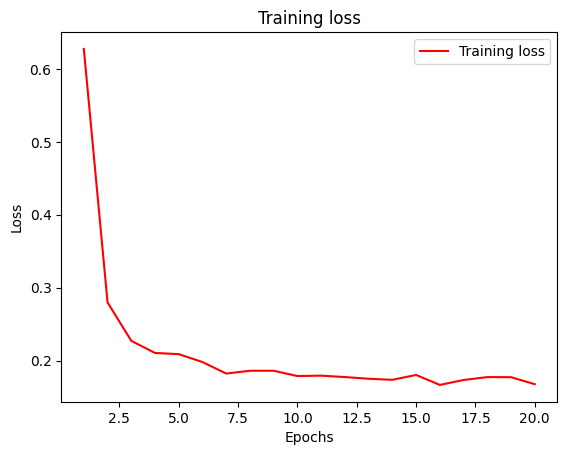

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

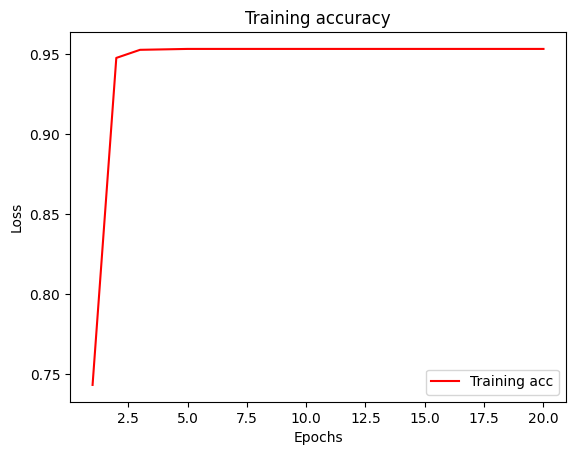

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluación del modelo sobre el set para test
result = model.evaluate(x_test, y_test) # Devuelve pérdida y accuracy
result

48/48 [==============================] - 0s 1ms/step - loss: 0.1746 - accuracy: 0.9463


[0.17459289729595184, 0.9462999105453491]

In [ ]:
x_test.shape

(1527, 10)

In [ ]:
y_test

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
# Guardo las predicciones del modelos para analizarlas
y_pred = model.predict(x_test)
y_pred

48/48 [==============================] - 0s 1ms/step


array([[0.10362878],
       [0.26640818],
       [0.01832093],
       ...,
       [0.2692684 ],
       [0.21083818],
       [0.07008331]], dtype=float32)

In [ ]:
# Se redondea la predicción de la salida
y_pred = [1.0 if p > 0.5 else 0 for p in y_pred]

print(classification_report(y_test, y_pred))
# Notar que hay un lindo problema de desbalance en los datos, muchos para "0" (gente que no tuvo ACV) y pocos para "1" (si ACV)
# Es probable que el modelo pretenda decir "0" casi siempre, porque esto es la salida "fácil" para mejorar el accuracy.
# Hay muchas técnicas para "balancear" un conjunto de datos desparejo, y así evitar la tendencia del modelo en el entrenamiento.

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1445
         1.0       0.00      0.00      0.00        82

    accuracy                           0.95      1527
   macro avg       0.47      0.50      0.49      1527
weighted avg       0.90      0.95      0.92      1527



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Visualización de los resultados utilizando la matriz de confusión
confusion_matrix(y_test, y_pred)
# Ahora se confirma la hipótesis de que probablemente la red aprende a decir que no hay ACV para maximizar el accuracy

array([[1445,    0],
       [  82,    0]])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión
def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

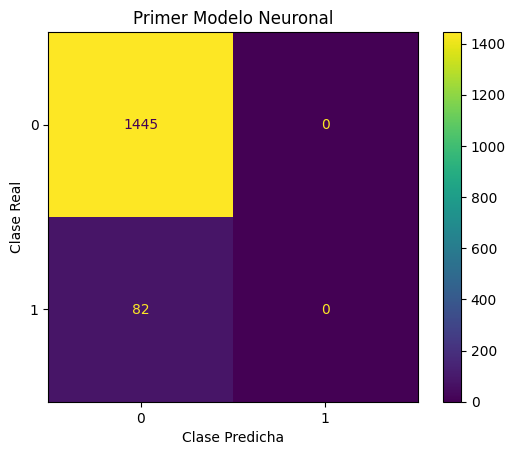

In [ ]:
# Gráfica de la Matriz de confusión (la más "linda")
plot_confusion_matrix(y_test, y_pred, model_name="Primer Modelo Neuronal")

In [ ]:
# El set esta bastante desbalanceado. Ya sea train o test, el dataset tiene esa naturaleza.
num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
print(" Cantidad '0': {} \n Cantidad '1': {}".format(num_zeros, num_ones))

 Cantidad '0': 3393 
 Cantidad '1': 167


In [ ]:
# Ejemplo para balancear datos
from imblearn.over_sampling import SMOTE
sm = SMOTE()

x_train, y_train = sm.fit_resample(x_train, y_train)

num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
print(" Cantidad '0': {} \n Cantidad '1': {}".format(num_zeros, num_ones))
# Ahora se equiparan ambas salidas. Investigar como opera esta clase
# En resumen, genera nuevas muestras a partir de las existentes para obtener más entradas de la clase desbalanceada
# La cantidad final resulta igual a la cantidad de la clase mayoritaria previo al resample.

 Cantidad '0': 3393 
 Cantidad '1': 3393


In [ ]:
# Pruebas sobre la misma RNA
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
54/54 [==============================] - 3s 14ms/step - loss: 0.6910 - accuracy: 0.5105
Epoch 2/20
54/54 [==============================] - 1s 15ms/step - loss: 0.6596 - accuracy: 0.6208
Epoch 3/20
54/54 [==============================] - 1s 10ms/step - loss: 0.5806 - accuracy: 0.7230
Epoch 4/20
54/54 [==============================] - 1s 11ms/step - loss: 0.5225 - accuracy: 0.7492
Epoch 5/20
54/54 [==============================] - 1s 14ms/step - loss: 0.5060 - accuracy: 0.7605
Epoch 6/20
54/54 [==============================] - 1s 13ms/step - loss: 0.4927 - accuracy: 0.7650
Epoch 7/20
54/54 [==============================] - 1s 12ms/step - loss: 0.4904 - accuracy: 0.7644
Epoch 8/20
54/54 [==============================] - 1s 11ms/step - loss: 0.4846 - accuracy: 0.7658
Epoch 9/20
54/54 [==============================] - 0s 8ms/step - loss: 0.4809 - accuracy: 0.7691
Epoch 10/20
54/54 [==============================] - 0s 8ms/step - loss: 0.4763 - accuracy: 0.7775
Epoch 11/20

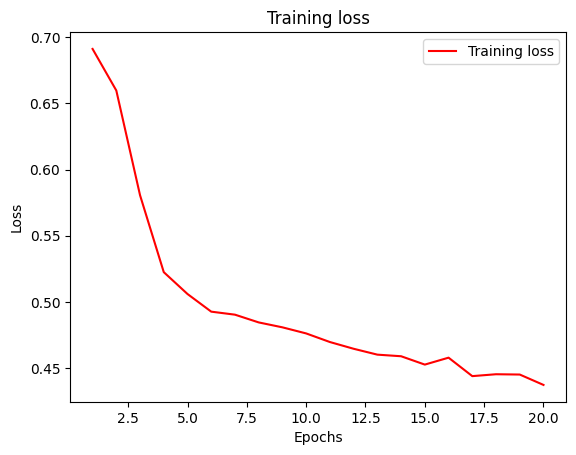

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

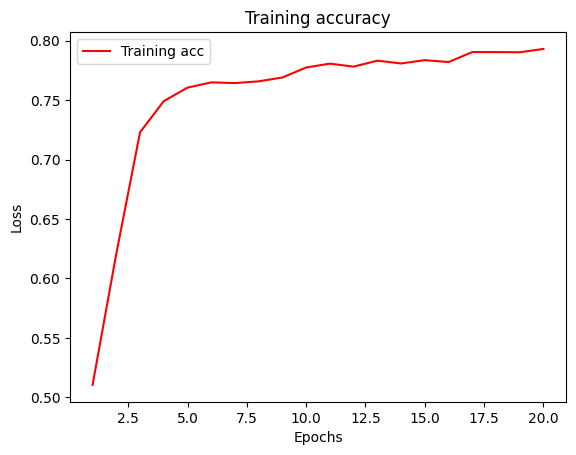

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
result = model.evaluate(x_test, y_test)
result

48/48 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.6385


[0.5097017288208008, 0.6385068893432617]

In [ ]:
num_zeros = (y_test == 0).sum()
num_ones = (y_test == 1).sum()
print(" Cantidad '0': {} \n Cantidad '1': {}".format(num_zeros, num_ones))

 Cantidad '0': 1445 
 Cantidad '1': 82


In [ ]:
y_test.shape

(1527,)

In [ ]:
1445/1527

0.9462999345121152

In [ ]:
y_pred = model.predict(x_test)
y_pred = [1.0 if p > 0.5 else 0 for p in y_pred]
print(classification_report(y_test, y_pred))

# Comparar resultados
# No siempre se obtienen mejoras al utilizar técnicas para el aumento de datos

48/48 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.63      0.77      1445
         1.0       0.12      0.87      0.20        82

    accuracy                           0.64      1527
   macro avg       0.55      0.75      0.49      1527
weighted avg       0.94      0.64      0.74      1527



In [ ]:
# Visualización de los resultados utilizando la matriz de confusión
confusion_matrix(y_test, y_pred)

# Ahora encuentra algunos con ACV, bastante mejor
# NOTAR que: jamás modifiqué nada en el set separado para test. Este sigue teniendo el desbalance natural de la población.

array([[904, 541],
       [ 11,  71]])

In [ ]:
num_zeros = (y_test == 0).sum()
num_ones = (y_test == 1).sum()
print(" Cantidad '0': {} \n Cantidad '1': {}".format(num_zeros, num_ones))

 Cantidad '0': 1445 
 Cantidad '1': 82


In [ ]:
x_train.shape

(6786, 10)

In [ ]:
# El set para train, se puede dividir para validación. Con esto se pueden obtener métricas relacionadas, criterios de parada, etc

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1)

In [ ]:
# Misma RNA para comparar
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

# Criterio de parada
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, restore_best_weights=True)

model.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='binary_crossentropy', metrics=['accuracy'])

# En el historial se guardan la información para el proceso con datos de validación
history = model.fit(x_train, y_train, epochs=150, batch_size=300, validation_data=(x_val, y_val), callbacks=early_stopping)

Epoch 1/150
16/16 [==============================] - 2s 25ms/step - loss: 0.6926 - accuracy: 0.5107 - val_loss: 0.6899 - val_accuracy: 0.6866
Epoch 2/150
16/16 [==============================] - 0s 15ms/step - loss: 0.6900 - accuracy: 0.5377 - val_loss: 0.6816 - val_accuracy: 0.7156
Epoch 3/150
16/16 [==============================] - 0s 18ms/step - loss: 0.6771 - accuracy: 0.6069 - val_loss: 0.6356 - val_accuracy: 0.7245
Epoch 4/150
16/16 [==============================] - 0s 15ms/step - loss: 0.6156 - accuracy: 0.6817 - val_loss: 0.5304 - val_accuracy: 0.7313
Epoch 5/150
16/16 [==============================] - 0s 18ms/step - loss: 0.5551 - accuracy: 0.7297 - val_loss: 0.5099 - val_accuracy: 0.7436
Epoch 6/150
16/16 [==============================] - 0s 15ms/step - loss: 0.5160 - accuracy: 0.7533 - val_loss: 0.4998 - val_accuracy: 0.7510
Epoch 7/150
16/16 [==============================] - 0s 22ms/step - loss: 0.5114 - accuracy: 0.7547 - val_loss: 0.4937 - val_accuracy: 0.7559
Epoch 

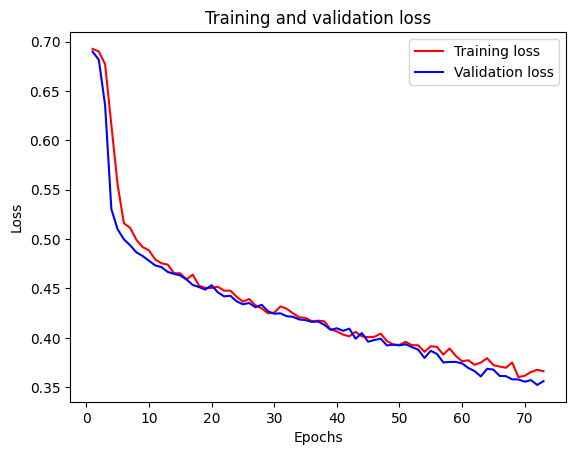

In [ ]:
# Notar que el entrenamiento anterior finalizó en la época 95 de 150, justamente por el nuevo criterio de parada establecido
# Entrena hasta que se cumpla algún criterio
# En este caso, se entrenó hasta un determinado accuracy en el set de train. Es de esperarse, que sobre test se obtenga un resultado muy parecido.

# Ahora se disponen de los datos para el set de validación
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

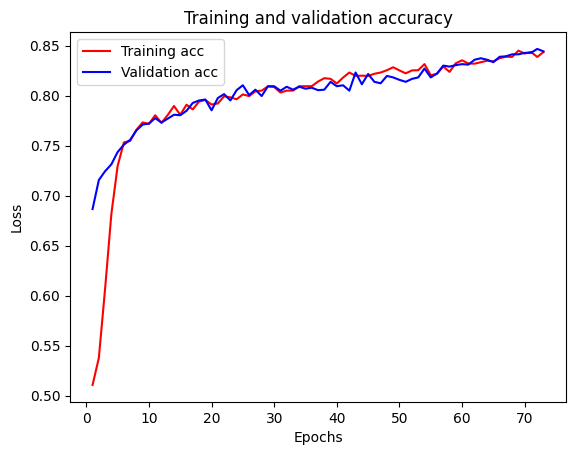

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# De estas curvas se pueden obtener varias conclusiones respecto a la red.
# En principio, deben ser bastante parecidas tanto train como val, reflejando el aprendizaje de la RNA
# El desempeño sobre val suele ser menor, son datos no utilizados para el entrenamiento
# Si en val se obtienen cosas muy diferentes, al realizar predicciones sobre el set para test va a pasar algo muy parecido

In [ ]:
result = model.evaluate(x_test, y_test)
result

48/48 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7250


[0.4754754304885864, 0.724950909614563]

In [ ]:
y_pred = model.predict(x_test)
y_pred = [1.0 if p > 0.5 else 0 for p in y_pred]
print(classification_report(y_test, y_pred))

48/48 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83      1445
         1.0       0.13      0.70      0.21        82

    accuracy                           0.72      1527
   macro avg       0.55      0.71      0.52      1527
weighted avg       0.93      0.72      0.80      1527



In [ ]:
confusion_matrix(y_test, y_pred)

array([[1050,  395],
       [  25,   57]])

## RNA - Bypass

In [ ]:
from tensorflow import keras

inputs = keras.Input(shape=(x_train.shape[1],))
a = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.2)(a)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.concatenate([a, x])
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation='sigmoid')(x)

nn = keras.Model(inputs, output, name="acv_predictor")
nn.summary()

Model: "acv_predictor"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 dense_33 (Dense)            (None, 64)                   704       ['input_1[0][0]']             
                                                                                                  
 dropout_30 (Dropout)        (None, 64)                   0         ['dense_33[0][0]']            
                                                                                                  
 dense_34 (Dense)            (None, 128)                  8320      ['dropout_30[0][0]']          
                                                                                      

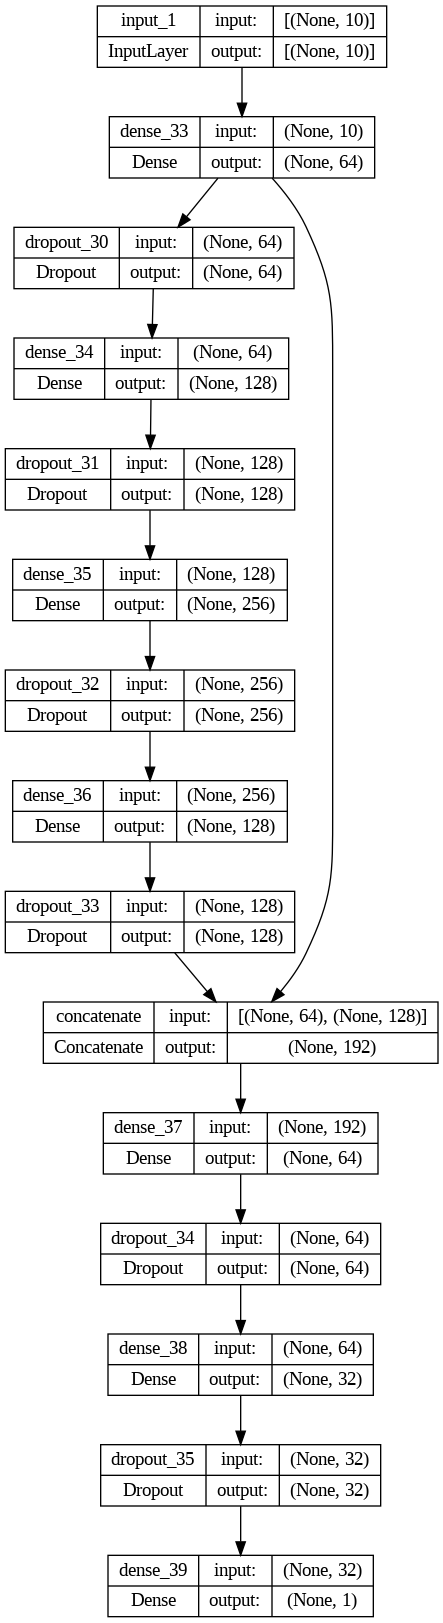

In [ ]:
from tensorflow.keras.utils import plot_model

# Herramienta para graficar la topología. Abajo hay una gráfica simplificada...
plot_model(nn, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

**Topología de ejemplo:**

Esta arquitectura contiene varias capas densas y una conexión de salto. Esta topología se suele utilizar para no perder ninguna de las conexiones más simples mientras se construyen conexiones más complejas.

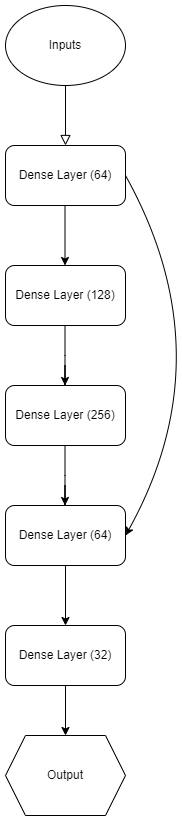




In [ ]:
nn.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Criterio extra de parada, si no cambia la pérdida en los datos de validación por 30 épocas
early_stopper = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Con verbose=0, apago directamente los log de salida...
history = nn.fit(x_train, y_train, epochs=200, callbacks=[early_stopper], validation_data=(x_val, y_val), verbose=0)

KeyboardInterrupt: ignored

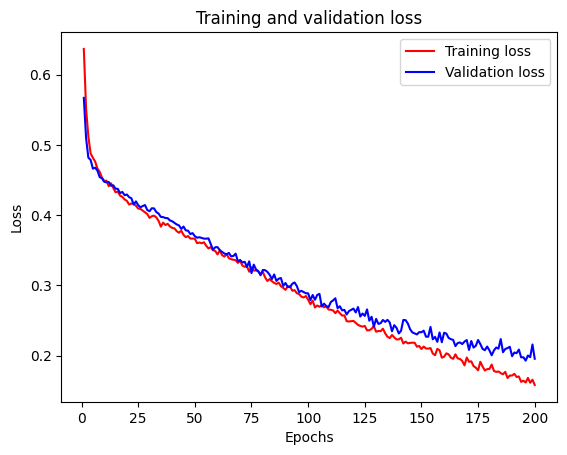

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ver diferencias entre las curvas de entrenamiento y validación

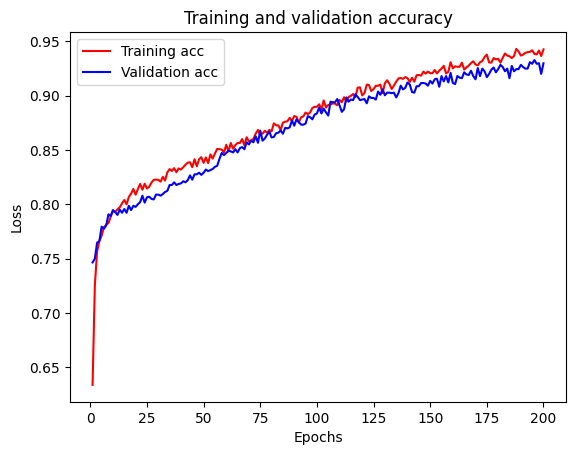

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = nn.predict(x_test)
y_pred = [1.0 if p > 0.5 else 0 for p in y_pred]
print(classification_report(y_test, y_pred))

48/48 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.90      1445
         1.0       0.11      0.32      0.16        82

    accuracy                           0.83      1527
   macro avg       0.53      0.59      0.53      1527
weighted avg       0.91      0.83      0.86      1527



In [ ]:
confusion_matrix(y_test, y_pred)

array([[1237,  208],
       [  56,   26]])

## Otros modelos de referencia (clasificadores)

Modelos de clasificación clásicos ya vistos.
Pueden usarse a modo informativo, o como punto de comparación para los resultados obtenidos con su RNA.
Se obtienen métricas en pocos segundos, y suelen usarse como punto de comparación a la hora de establecer los hiperparámetros de forma fina.

En este punto, es evidente que en dónde más se consume tiempo es en la preparación de los datos.

### Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Hay muchos parámetros para esto, lo interesante es que en pocas líneas se puede tener una primera impresión
tree_clf = DecisionTreeClassifier(random_state=1)

# Entrenamiento. Si ejecutaron todo el notebook, los últimos set de train son los aumentados para equiparar las clases.
tree_clf.fit(x_train, y_train)

pred = tree_clf.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  0.8755730189914865
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.93      1445
         1.0       0.14      0.24      0.17        82

    accuracy                           0.88      1527
   macro avg       0.55      0.58      0.55      1527
weighted avg       0.91      0.88      0.89      1527



### Red Neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier()
nn_clf.fit(x_train, y_train)
pred = nn_clf.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  0.816633922724296
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.84      0.90      1445
         1.0       0.13      0.44      0.20        82

    accuracy                           0.82      1527
   macro avg       0.55      0.64      0.55      1527
weighted avg       0.92      0.82      0.86      1527



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### K Vecinos Cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
pred = knn_clf.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  0.7904387688277669
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.81      0.88      1445
         1.0       0.11      0.40      0.17        82

    accuracy                           0.79      1527
   macro avg       0.53      0.61      0.53      1527
weighted avg       0.91      0.79      0.84      1527



### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  0.7242960052390308
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.72      0.83      1445
         1.0       0.15      0.85      0.25        82

    accuracy                           0.72      1527
   macro avg       0.57      0.79      0.54      1527
weighted avg       0.94      0.72      0.80      1527



### eXtreme Gradient Boosting (XGB)


In [ ]:
from xgboost import XGBClassifier

xgbc_clf = XGBClassifier()
xgbc_clf.fit(x_train, y_train)
pred = xgbc_clf.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  0.9155206286836935
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1445
         1.0       0.14      0.11      0.12        82

    accuracy                           0.92      1527
   macro avg       0.54      0.54      0.54      1527
weighted avg       0.91      0.92      0.91      1527

